In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from collections import Counter
from wordcloud import WordCloud

# Exploratory Data Analysis
Here we will explore about the dataset and the possibility to improve quality of our modelling.

In [2]:
# Preview the Raw Data
df = pd.read_csv('/kaggle/input/tokopedia-product-reviews/product_reviews_dirty.csv')
df.head()

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
0,1,Barang sesuai pesanan dan cepat sampai,5,pertukangan,Staples Dekorasi Staples Kayu + Refill 8mm - S...,418660637,1,1740837,https://www.tokopedia.com/shakaonline87/staple...
1,2,Barang bagus harga murah,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...
2,3,Paket rapi...mantap....cepat....sampe ke tujuan,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...
3,4,ya saya puas dgn barangnya,5,pertukangan,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...,102279869,5,771395,https://www.tokopedia.com/kamarmesin/alat-stap...
4,5,Responya luar biasa b mantap,5,pertukangan,Isi Refill Staples Jok Kulit Motor / Staple Gu...,190679689,787,969999,https://www.tokopedia.com/mitrapersada/isi-ref...


In [3]:
# Review the Data type and columns of Raw Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40607 entries, 0 to 40606
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    40607 non-null  int64 
 1   text          40607 non-null  object
 2   rating        40607 non-null  int64 
 3   category      40607 non-null  object
 4   product_name  40607 non-null  object
 5   product_id    40607 non-null  int64 
 6   sold          40593 non-null  object
 7   shop_id       40607 non-null  int64 
 8   product_url   40607 non-null  object
dtypes: int64(4), object(5)
memory usage: 2.8+ MB


## Feature Selection

In [4]:
# Feature Selection for Sentiment Analysis task
data = df[['text','rating']]

In [5]:
# Review the selected features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40607 entries, 0 to 40606
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40607 non-null  object
 1   rating  40607 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 634.6+ KB


In [6]:
# Preview Sample of Data from selected features
data.head()

,text,rating
0,Barang sesuai pesanan dan cepat sampai,5
1,Barang bagus harga murah,5
2,Paket rapi...mantap....cepat....sampe ke tujuan,5
3,ya saya puas dgn barangnya,5
4,Responya luar biasa b mantap,5


## Feature Engineering

In [7]:
# Check the classification label
data['rating'].unique()

array([5, 3, 4, 2, 1])

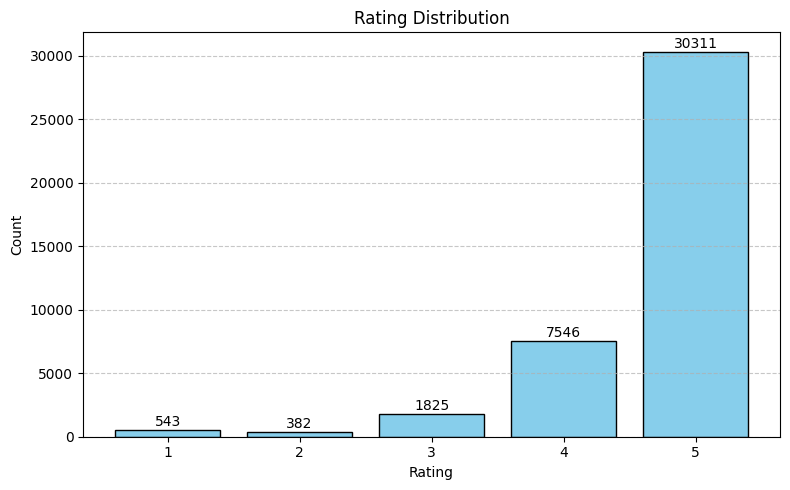

In [8]:
# Count each rating
rating_counts = data['rating'].value_counts().sort_index()

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(rating_counts.index, rating_counts.values, color='skyblue', edgecolor='black')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 50, f'{int(height)}', 
            ha='center', va='bottom', fontsize=10)

ax.set_title('Rating Distribution')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [9]:
def map_sentiment(rating):
    if rating <= 3:
        return 'negative'
    else:
        return 'positive'

# Apply the mapping
data['sentiment'] = data['rating'].apply(map_sentiment)

# Check the result
print(data[['rating', 'sentiment']].head())
print(data['sentiment'].value_counts())

   rating sentiment
0       5  positive
1       5  positive
2       5  positive
3       5  positive
4       5  positive
sentiment
positive    37857
negative     2750
Name: count, dtype: int64


/tmp/ipykernel_13/498583473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['rating'].apply(map_sentiment)


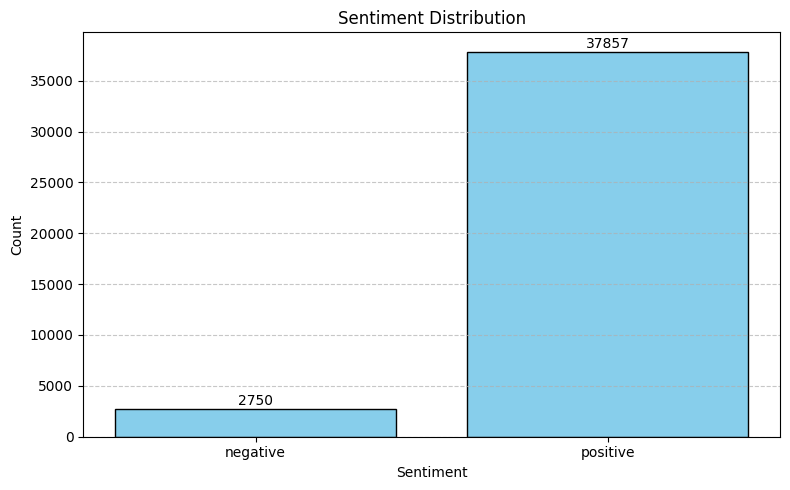

In [10]:
# Count each rating
sentiment_counts = data['sentiment'].value_counts().sort_index()

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(sentiment_counts.index, sentiment_counts.values, color='skyblue', edgecolor='black')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 50, f'{int(height)}', 
            ha='center', va='bottom', fontsize=10)

ax.set_title('Sentiment Distribution')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [11]:
# Export raw data with new label (Without Preprocessing)
data[['text','sentiment']].to_csv('/kaggle/working/raw_data_with_sentiment_label.csv')

## Sequence and Word Analysis

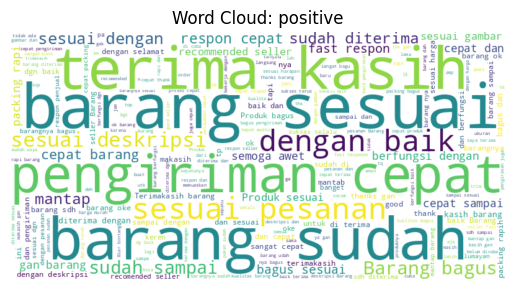

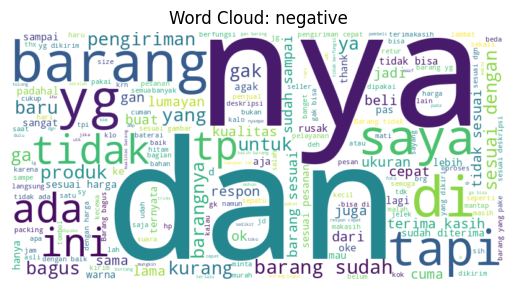

In [12]:
# Review the words occur on each label
sentiments = data['sentiment'].unique()
for sentiment in sentiments:
    text = ' '.join(data[data['sentiment'] == sentiment]['text'].dropna())
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud: {sentiment}")
    plt.show()

In [13]:
# Review number of tokens of words
data['text'].str.split().str.len().describe()

count    40607.000000
mean         7.940626
std          7.171776
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max        208.000000
Name: text, dtype: float64

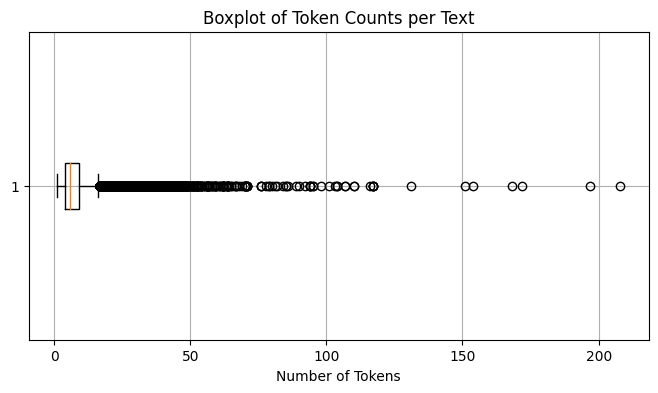

In [14]:
token_lengths = data['text'].str.split().str.len()

# Box plot for data length review
plt.figure(figsize=(8, 4))
plt.boxplot(token_lengths, vert=False)
plt.title("Boxplot of Token Counts per Text")
plt.xlabel("Number of Tokens")
plt.grid(True)
plt.show()

/tmp/ipykernel_13/3689124475.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['token_length'] = data['text'].str.split().str.len()


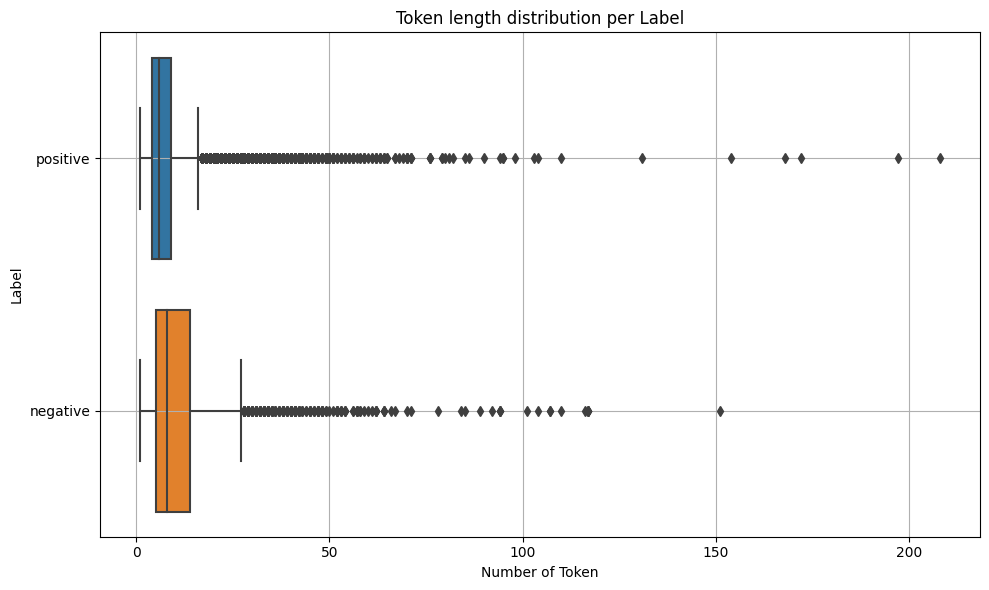

In [15]:
# Count token per sentiment
sample_df = data
sample_df['token_length'] = data['text'].str.split().str.len()

# Plot boxplot per label
plt.figure(figsize=(10, 6))
sns.boxplot(data=sample_df, x='token_length', y='sentiment', orient='h')
plt.title("Token length distribution per Label")
plt.xlabel("Number of Token")
plt.ylabel("Label")
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# Review Longest word
pd.set_option('display.max_colwidth', None)

data[data['text'].str.split().str.len() == 208]

,text,rating,sentiment,token_length
34358,"Inilah review non bias dari saya.\n\nWell, im impressed. Saya bisa berkata jika sarung tangan ini termasuk sarung tangan ""Kasta"" tinggi, harga mahal memang sih tapi sangat sesuai dengan harga, dan saya berani berkata kalau ini memang mizuno asli, no kw.\n\nSaya tidak tahu jika ini synthethic leather atau tidak jadi saya tidak mau membahas itu. But untuk glove nya benar-benar memuaskan. Secara aesthetic warna nya ya seperti yang kalian lihat di tv tv, warna coklat. Untuk bagian telapak warna coklat nya lebih gelap daripada yang bagian luar. Untuk secara interior, bagian dalam nya sangat nyaman dipakai dan tidak akan membuat pegal. Di bagian jari jempol ada semacam leather strip kecil supaya jempol kita masih bisa fit. Bahkan saya yang tergolong tangan nya kecil pun bisa masuk ke gloves ini dengan fine fine saja tanpa terasa kendur.\n\nUntuk bagian luar saya juga suka, karena pada bagian luar padding nya sangat tebal sehingga jika ada bola yang terlempar walaupun tidak masuk ke bagian ""Net"" nya masih saja tidak terasa sakit karena padding nyaman. Juga ada semacam jahitan dari leather di bagian luar dekat jari, jadi jika memang kena jari juga tetap terlindungi.\n\nItulah review saya, jika review ini membantu click tombol like nya supaya orang lain ikut terbantu ^^",5,positive,208


In [17]:
# Reset pandas view
pd.reset_option('display.max_colwidth')

In [18]:
# Check for numerical data
data[data['text'].str.contains(r'\d', na=False)]

,text,rating,sentiment,token_length
39,seller is good. produknya mantap. 5 stars ya,5,positive,8
44,Respon dan proses dr penjual cepat. Barang sdh...,5,positive,18
51,Steplesnya sedikit lebih kecil dari staples kh...,4,positive,29
115,"Php, bilang isi ada diseskripsi pas dipesen be...",1,negative,14
148,Seller merespon dengan cepat dengan proses pen...,5,positive,27
...,...,...,...,...
40566,"Layanan supercepat,nilai 10 utk toko penjual.",4,positive,6
40577,berharap bisa dibawa untuk hadiah tapi karena ...,4,positive,35
40604,"pelayanan kurang sigap, berhari2 dr nanya baik...",1,negative,45
40605,"barang yg dikirim tsk sesuai wrn, kl memang dr...",1,negative,78


In [19]:
# Check for symbol
data[data['text'].str.contains(r'[^\w\s]', na=False)]

,text,rating,sentiment,token_length
2,Paket rapi...mantap....cepat....sampe ke tujuan,5,positive,4
5,"seller top, pengiriman cepat barang oke",5,positive,6
7,Produk sesuai dengan spec di web dan respon se...,5,positive,12
8,"Respon super cepat, pengiriman cepat, Barang b...",5,positive,11
9,"Barang mantap, pelayanan cepat",5,positive,4
...,...,...,...,...
40602,gak bisa ditutup.. ukuran gak pas..,1,negative,6
40603,Penjual krg peduli dan brg jelek. Brg yg dikir...,1,negative,35
40604,"pelayanan kurang sigap, berhari2 dr nanya baik...",1,negative,45
40605,"barang yg dikirim tsk sesuai wrn, kl memang dr...",1,negative,78


In [20]:
# Check for trailing space
data[data['text'].str.contains(r'\s{2,}', na=False)]

,text,rating,sentiment,token_length
11,Sayang produk yg datang di paking kurang rapi ...,3,negative,48
17,Cara Memberikan Nilai Reputasi ke Penjual\n\nU...,5,positive,19
20,"bagus, packing aman pake bublewrap. ndak ada...",5,positive,9
83,"bagus ,.................... ........",5,positive,3
122,ok.................. . .. . ..,5,positive,5
...,...,...,...,...
40548,barang sudah sampai.. walapoun agak lama.. \nt...,3,negative,12
40565,goo.....d.............. .........,4,positive,2
40568,"sesuai gambar.. cuma pengiriman agak lama, mu...",5,positive,13
40570,bayar pagi.siang langsung dikirim.\nkualitas o...,5,positive,18


In [21]:
# Check for uppercase
data[data['text'].str.contains(r'[A-Z]')]

,text,rating,sentiment,token_length
0,Barang sesuai pesanan dan cepat sampai,5,positive,6
1,Barang bagus harga murah,5,positive,4
2,Paket rapi...mantap....cepat....sampe ke tujuan,5,positive,4
4,Responya luar biasa b mantap,5,positive,5
7,Produk sesuai dengan spec di web dan respon se...,5,positive,12
...,...,...,...,...
40594,Produk sdh di terima dan ok,4,positive,6
40598,"Mantab, pengiriman sangat cepat, barang pking ...",5,positive,22
40599,Brg yg mau dilindungi dikirim tanpa ini,1,negative,7
40603,Penjual krg peduli dan brg jelek. Brg yg dikir...,1,negative,35


# Data Preprocessing

## Duplicated Removal

In [22]:
# Remove exact duplicates based on 'text' only
data = data.drop_duplicates(subset='text').reset_index(drop=True)

## Text Cleansing

In [23]:
def cleansing(df):
    df_clean=df.str.lower()
    df_clean=[re.sub(r"\d+","",i )for i in df_clean]
    df_clean=[re.sub(r'[^\w]', ' ', i)for i in df_clean]
    df_clean=[re.sub(r'\s+',' ',i)for i in df_clean]
    
    return df_clean

data['clean_text'] = cleansing(data['text'])

In [24]:
data.head()

,text,rating,sentiment,token_length,clean_text
0,Barang sesuai pesanan dan cepat sampai,5,positive,6,barang sesuai pesanan dan cepat sampai
1,Barang bagus harga murah,5,positive,4,barang bagus harga murah
2,Paket rapi...mantap....cepat....sampe ke tujuan,5,positive,4,paket rapi mantap cepat sampe ke tujuan
3,ya saya puas dgn barangnya,5,positive,5,ya saya puas dgn barangnya
4,Responya luar biasa b mantap,5,positive,5,responya luar biasa b mantap


In [25]:
# Review number of tokens of words after cleaned
data['clean_text'].str.split().str.len().describe()

count    37301.000000
mean         8.144822
std          7.138341
min          0.000000
25%          5.000000
50%          6.000000
75%          9.000000
max        208.000000
Name: clean_text, dtype: float64

In [26]:
# Remove rows where 'text' is NaN or an empty string (after stripping spaces)
data = data[data['clean_text'].notna()]                # Remove NaNs
data = data[data['clean_text'].str.strip() != '']      # Remove empty or whitespace-only strings

# Optional: Reset index
data = data.reset_index(drop=True)

# Check result
print(data.shape)

(37180, 5)


In [27]:
# Remove exact duplicates based on 'clean_text' only
data = data.drop_duplicates(subset='clean_text').reset_index(drop=True)

In [28]:
# Review number of tokens of words after cleaned
data['clean_text'].str.split().str.len().describe()

count    35143.000000
mean         8.460405
std          7.220273
min          1.000000
25%          5.000000
50%          7.000000
75%         10.000000
max        208.000000
Name: clean_text, dtype: float64

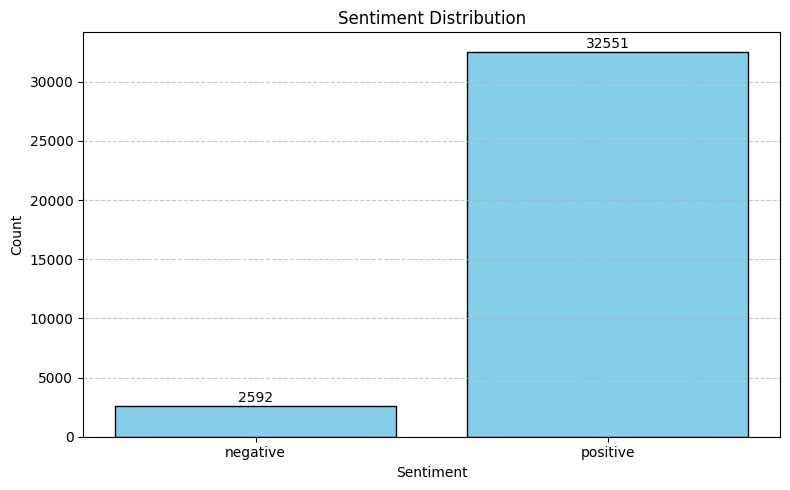

In [29]:
# Count each rating after text cleaned
sentiment_counts = data['sentiment'].value_counts().sort_index()

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(sentiment_counts.index, sentiment_counts.values, color='skyblue', edgecolor='black')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 50, f'{int(height)}', 
            ha='center', va='bottom', fontsize=10)

ax.set_title('Sentiment Distribution')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [30]:
# Export raw data with new label (Without Preprocessing)
data[['clean_text','sentiment']].to_csv('/kaggle/working/preprocessed_data_clean.csv')

## Training Test Split


In [31]:
# Step 1: Sample stratified test set
test_data = (
    data.groupby('sentiment', group_keys=False)
        .apply(lambda x: x.sample(n=500, random_state=42))
        .reset_index(drop=True)
)

# Step 2: Remove test samples from training set by text
train_data = data[~data['clean_text'].isin(test_data['clean_text'])].reset_index(drop=True)

# Step 3: Double-check no overlap
overlap = pd.merge(train_data, test_data, how='inner', on=['clean_text'])
print(f"Overlap count: {len(overlap)}")  # Should be 0

Overlap count: 0


/tmp/ipykernel_13/4139319580.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=500, random_state=42))


In [32]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          1000 non-null   object
 1   rating        1000 non-null   int64 
 2   sentiment     1000 non-null   object
 3   token_length  1000 non-null   int64 
 4   clean_text    1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34143 entries, 0 to 34142
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          34143 non-null  object
 1   rating        34143 non-null  int64 
 2   sentiment     34143 non-null  object
 3   token_length  34143 non-null  int64 
 4   clean_text    34143 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.3+ MB


In [34]:
# Export raw data with new label (Without Preprocessing)
test_data[['clean_text','sentiment']].to_csv('/kaggle/working/test_data.csv')
train_data[['clean_text','sentiment']].to_csv('/kaggle/working/train_data.csv')